In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)


In [2]:
df = pd.read_csv('/home/student24/Coop_Projects/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


About Dataset

This dataset contains information on job candidates applying for data science roles. It includes demographic details, education background, work experience, and training hours. The target variable indicates whether a candidate is looking for a new job (1) or not (0).

Key Columns

    enrollee_id: Unique identifier for each candidate.
    city: City where the candidate is located.
    city_development_index: Development index score of the city (0-1 scale).
    gender: Candidate's gender (Male, Female, Other).
    relevent_experience: Whether the candidate has relevant experience.
    enrolled_university: Candidate’s enrollment status (full-time, part-time, or not enrolled).
    education_level: Highest level of education.
    major_discipline: Field of study (STEM, Business, etc.).
    experience: Years of professional experience.
    company_size: Size of the last company worked at.
    company_type: Type of company (e.g., Pvt Ltd, Startup, etc.).
    training_hours: Hours spent in training.
    target: Binary indicator (1 = looking for a new job, 0 = not looking).


In [3]:
df.describe()

,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [5]:
# Check for missing values
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [10]:
# Count the total number of missing values
total_missing_values = df.isnull().sum().sum()

print("Total number of missing values:", total_missing_values)

# Get the total number of observations
total_observations = df.shape[0]

print("Total number of observations:", total_observations)


# Get the total number of data points (entries)
total_entries = df.size  # This gives the total number of elements (rows * columns)

# Alternatively, to get the total number of rows
total_rows = df.shape[0]

print("Total number of data entries (elements):", total_entries)
print("Total number of rows (observations):", total_rows)


Total number of missing values: 21555
Total number of observations: 19158
Total number of data entries (elements): 249054
Total number of rows (observations): 19158


Class Distribution:
target
0.0    14381
1.0     4777
Name: count, dtype: int64
The data is balanced.


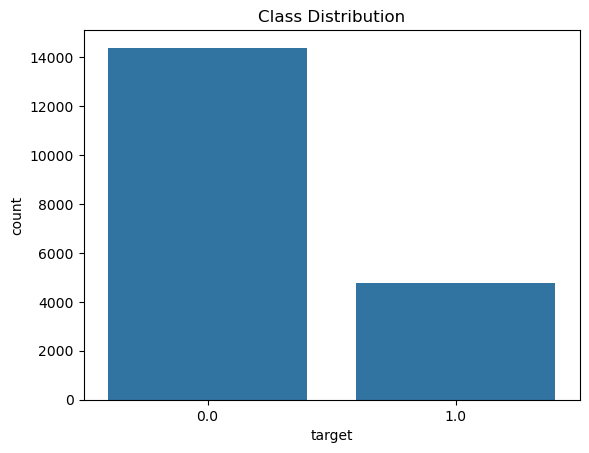

In [13]:
# Count the number of observations per class in the target column
class_counts = df['target'].value_counts()

print("Class Distribution:")
print(class_counts)

# Check for balance
if class_counts.min() / class_counts.max() < 0.1:  # For example, a ratio of 0.1 indicates imbalance
    print("The data is unbalanced.")
else:
    print("The data is balanced.")
    
    

# Visualize the distribution of classes
sns.countplot(x='target', data=df)
plt.title("Class Distribution")
plt.show()

In [15]:
# Count the number of observations for the target variable
class_counts = df['target'].value_counts()

print("Number of observations for each class in the target variable:")
print(class_counts)

total_observations = df.shape[0]
print(f"Total number of observations in the dataset: {total_observations}")

Number of observations for each class in the target variable:
target
0.0    14381
1.0     4777
Name: count, dtype: int64
Total number of observations in the dataset: 19158
